In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scripts.snap_reader import PlanetReader, DiscReader, DiscSnap, PlanetSnap, PlanetSnapBetter
%config InlineBackend.figure_format = 'svg'

In [3]:
# planets = PlanetReader('output/A_dust_new', base="planet")

In [4]:
# fig2, ax2 = plt.subplots(1,3, figsize = (15,4))
# timesteps = np.array([0, 0.1, 1, 2, 3]) * 1e6 / 1e4
# colours = ["crimson", "sandybrown", "darkseagreen", "navy", "deeppink", "darkorange"]
# for i, t in enumerate(timesteps):
#     t = f"{int(t):04d}"
#     disc_data = DiscSnap(f'output/booth_stock/disc_{t}.dat')
#     small_dust_frac = disc_data.dust_frac[0]
#     large_dust_frac = disc_data.dust_frac[1]
#     ax2[0].loglog(disc_data.R, disc_data.Sigma, color = colours[i])
#     ax2[0].loglog(disc_data.R, disc_data.Sigma*large_dust_frac, linestyle = "--", color=colours[i])
#     ax2[1].loglog(disc_data.R, disc_data.T, color=colours[i])
#     ax2[2].loglog(disc_data.R, disc_data.grain_size[1], color=colours[i])

# ax2[0].set_ylim(1e-3, 2e5)

In [5]:
# fig2, ax2 = plt.subplots(1,3, figsize = (15,4))
# timesteps = np.array([0, 0.1, 1, 2, 3]) * 1e6 / 1e4
# colours = ["crimson", "sandybrown", "darkseagreen", "navy", "deeppink", "darkorange"]
# for i, t in enumerate(timesteps):
#     t = f"{int(t):04d}"
#     planet_data = DiscSnap(f'output/A_dust_new/disc_{t}.dat')
#     small_dust_frac = planet_data.dust_frac[0]
#     large_dust_frac = planet_data.dust_frac[1]
#     ax2[0].loglog(planet_data.R, planet_data.Sigma, color = colours[i])
#     ax2[0].loglog(planet_data.R, planet_data.Sigma*large_dust_frac, linestyle = "--", color=colours[i])
#     ax2[1].loglog(planet_data.R, planet_data.T, color=colours[i])
#     ax2[2].loglog(planet_data.R, planet_data.grain_size[1], color=colours[i])

# ax2[0].set_ylim(1e-3, 2e5)
# # fig.suptitle("Chambers w/ ChambersEOS")
# # plt.savefig("figures/chambers_chambers_eos.pdf")

In [6]:
# DIR = "output/new_model/"

# fig2, ax2 = plt.subplots(1,3, figsize = (15,4))
# timesteps = np.array([0, 0.1, 1, 2, 3]) * 1e6 / 1e4
# colours = ["crimson", "sandybrown", "darkseagreen", "navy", "deeppink", "darkorange"]
# for i, t in enumerate(timesteps):
#     t = f"{int(t):04d}"
#     planet_data = DiscSnap(f'{DIR}disc_{t}.dat')
#     small_dust_frac = planet_data.dust_frac[0]
#     large_dust_frac = planet_data.dust_frac[1]
#     ax2[0].loglog(planet_data.R, planet_data.Sigma, color = colours[i], label = f"{int(t)/100:.1f} Myr")
#     ax2[0].loglog(planet_data.R, planet_data.Sigma*large_dust_frac, linestyle = "--", color = colours[i])
#     ax2[1].loglog(planet_data.R, planet_data.T, color=colours[i], label = f"{int(t)/100:.1f} Myr")
#     ax2[2].loglog(planet_data.R, planet_data.grain_size[1], color=colours[i], label = f"{int(t)/100:.1f} Myr")
# ax2[0].legend()
# ax2[1].legend()
# ax2[2].legend()

# ax2[0].set_ylim(1e-3, 2e5)

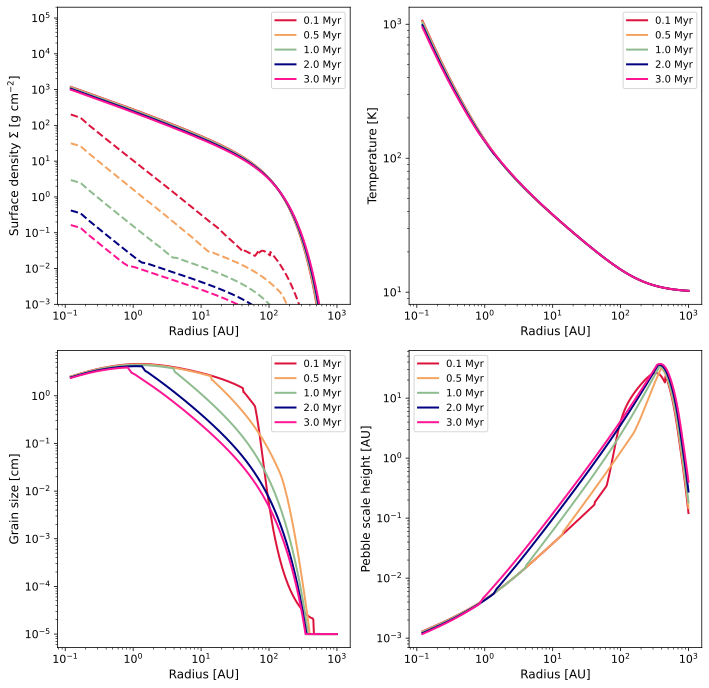

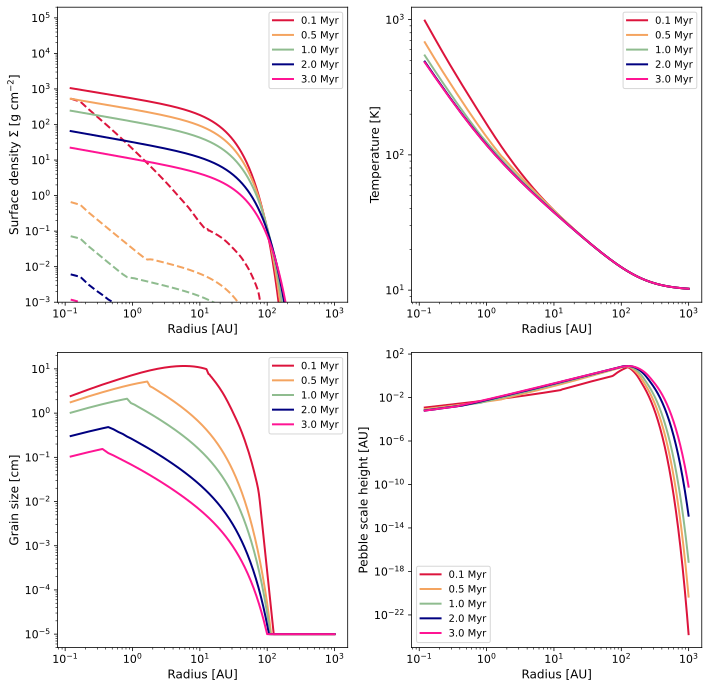

In [7]:
class plot:
    def __init__(self, DIR):
        self.fig, self.ax = self.plot_disk(DIR)

    def plot_disk(self, DIR):
        fig, ax = plt.subplots(2, 2, figsize=(10, 10))
        timesteps = np.array([0.1, 0.5, 1, 2, 3]) * 1e6 / 1e4
        colours = ["crimson", "sandybrown", "darkseagreen", "navy", "deeppink", "darkorange"]
        for i, t in enumerate(timesteps):
            t = f"{int(t):04d}"
            disc_data = DiscSnap(f'output/{DIR}/disc_{t}.dat')
            small_dust_frac = disc_data.dust_frac[0]
            large_dust_frac = disc_data.dust_frac[1]
            ax[0, 0].loglog(disc_data.R, disc_data.Sigma, color=colours[i], label=f"{int(t)/100:.1f} Myr", linewidth=2)
            ax[0, 0].loglog(disc_data.R, disc_data.Sigma * large_dust_frac, linestyle="--", color=colours[i], linewidth=2)
            ax[0, 1].loglog(disc_data.R, disc_data.T, color=colours[i], label=f"{int(t)/100:.1f} Myr", linewidth=2)
            ax[1, 0].loglog(disc_data.R, disc_data.grain_size[1], color=colours[i], label=f"{int(t)/100:.1f} Myr", linewidth=2)
            try:
                ax[1, 1].loglog(disc_data.R, disc_data.Hp[1], color=colours[i], label=f"{int(t)/100:.1f} Myr", linewidth=2)
            except: pass

        ax[0, 0].set_ylim(1e-3, 2e5)
        for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
            ax[i, j].set_xlabel("Radius [AU]", fontsize=12)
            ax[i, j].tick_params(axis='both', which='major', labelsize=11)
            ax[i, j].legend()
        ax[0, 0].set_ylabel(r"Surface density $\Sigma$ [g cm$^{-2}$]", fontsize=12)
        ax[0, 1].set_ylabel(r"Temperature [K]", fontsize=12)
        ax[1, 0].set_ylabel(r"Grain size [cm]", fontsize=12)
        ax[1, 1].set_ylabel(r"Pebble scale height [AU]", fontsize=12)
        fig.suptitle(DIR)
        fig.tight_layout()

        return fig, ax
    
    def save_fig(self, path):
        self.fig_title(None)
        self.fig.savefig(path)

    def fig_title(self, title=None):
        self.fig.suptitle(title)


# plot_disk("A_simpledisc")
figure = plot("A_irr").save_fig("/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4B/PHYS 437B/Final Report/figures/A_irr.svg")
figure = plot("A_irr_winds").save_fig("/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4B/PHYS 437B/Final Report/figures/A_irr_winds.svg")

# plot("A_irr_winds")
# plot_disk("A_planets")
# plot_disk("A_booth")
# plot_disk("output/A_planets/")
# plot_disk("output/A_planets_wind/")
# plot_disk("A_planets_wind_dom")
# plot_disk("A_planets_fix")
# plot_disk("A_booth_irr")